In [494]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt
import numpy as np
from config import password

In [495]:
pymysql.install_as_MySQLdb()

In [496]:
engine = create_engine('mysql://' + "root" + ':' + password + '@imdb-project.cj1m13sfkxlg.us-east-2.rds.amazonaws.com:3306/baseball')

In [497]:
sql = """SELECT Game as Game_ID, `Number` as Opponent_Number,
REPLACE(LEFT(YYYYMMDD,10),'-','') as Date,
CASE WHEN DAYOFWEEK(YYYYMMDD)= 1 OR DAYOFWEEK(YYYYMMDD) = 7 THEN '1' ELSE '0' END as Is_Weekend,
Month(YYYYMMDD) as Month,
Year(YYYYMMDD) as Year,
CASE WHEN `D/N` = 'D' THEN 1 ELSE 0 END as Is_Day, 
LENGTH(Streak) - LENGTH(REPLACE(Streak,'+','')) as Win_Streak,
`W-L`,
Bobble_head,
precip,
Temp,
Attendance
FROM Dodgers_data as dodger
LEFT JOIN Opponent_Map as map on dodger.Opponent = map.Opponent"""

In [498]:
df = pd.read_sql(sql, con=engine)

In [499]:
df

,Game_ID,Opponent_Number,Date,Is_Weekend,Month,Year,Is_Day,Win_Streak,W-L,Bobble_head,precip,Temp,Attendance
0,1,1,20170403,0,4,2017,1,1,01-00,0,0.00,60.0,"53,701"
1,2,1,20170404,0,4,2017,0,0,01-01,0,0.00,62.0,"42,196"
2,3,1,20170405,0,4,2017,0,1,02-01,0,0.00,67.0,"38,373"
3,4,1,20170406,0,4,2017,1,2,03-01,0,0.00,66.0,"36,501"
4,115,1,20170811,0,8,2017,0,0,81-34,0,0.00,86.0,"52,898"
5,116,1,20170812,1,8,2017,0,1,82-34,0,0.00,86.0,"53,230"
6,117,1,20170813,1,8,2017,1,2,83-34,0,0.10,75.0,"46,128"
7,157,1,20170925,0,9,2017,0,2,100-57,0,0.00,76.0,"49,419"
8,158,1,20170926,0,9,2017,0,3,101-57,1,0.00,76.0,"47,432"
9,159,1,20170927,0,9,2017,0,4,102-57,0,0.00,71.0,"47,273"


In [500]:
Winning_Per = [] 
Win_Per = []
for element in df["W-L"]:
    
    Winning_Per.append(element.replace('-', ' ').split(' '))
    
for thing in Winning_Per:
    Win_Per.append(float(thing[0]) /(float(thing[0]) + float(thing[1])))
    

In [501]:
df["Win_Per"] = Win_Per

In [502]:
#list_2 = df["DAYOFWEEK(YYYYMMDD)"] == 7
#list_2_encoded = []

In [503]:
#for number in [1,2,3,4,5,6,7]:
 #   list_2 = df["DAYOFWEEK(YYYYMMDD)"] == number
  #  list_2_encoded = []

   # for element in list_2:
    #    if element:
     #       list_2_encoded.append(1)
      #  else:
       #     list_2_encoded.append(0)
   # df["encoded_day_" + str(number)] = list_2_encoded   

In [504]:
seasons = []

In [505]:
for date in df["Date"]:
    if date[0:4] == '2017':
        seasons.append(7)
    elif date[0:4] == '2016':
        seasons.append(6)
    elif date[0:4] == '2015':
        seasons.append(5)
    elif date[0:4] == '2014':
        seasons.append(4)
    elif date[0:4] == '2013':
        seasons.append(3)
    elif date[0:4] == '2012':
        seasons.append(2)
    elif date[0:4] == '2011':
        seasons.append(1)
    else:
        print("error")

In [506]:
seasons

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,


In [507]:
df["Seasons"] = seasons

In [508]:

df["Attedance"] = df["Attendance"].str.replace(',', '').astype(float)


In [509]:
df["Date"] = pd.to_datetime(df["Date"])

In [510]:
df
Game_ID_sq = []
Game_ID_cub = []
for game in df["Game_ID"]:
    Game_ID_sq.append(game**2)
    Game_ID_cub.append(game**3)
df["Game_ID_sq"] = Game_ID_sq
df["Game_ID_cub"] = Game_ID_cub
df

,Game_ID,Opponent_Number,Date,Is_Weekend,Month,Year,Is_Day,Win_Streak,W-L,Bobble_head,precip,Temp,Attendance,Win_Per,Seasons,Attedance,Game_ID_sq,Game_ID_cub
0,1,1,2017-04-03,0,4,2017,1,1,01-00,0,0.00,60.0,"53,701",1.000000,7,53701.0,1,1
1,2,1,2017-04-04,0,4,2017,0,0,01-01,0,0.00,62.0,"42,196",0.500000,7,42196.0,4,8
2,3,1,2017-04-05,0,4,2017,0,1,02-01,0,0.00,67.0,"38,373",0.666667,7,38373.0,9,27
3,4,1,2017-04-06,0,4,2017,1,2,03-01,0,0.00,66.0,"36,501",0.750000,7,36501.0,16,64
4,115,1,2017-08-11,0,8,2017,0,0,81-34,0,0.00,86.0,"52,898",0.704348,7,52898.0,13225,1520875
5,116,1,2017-08-12,1,8,2017,0,1,82-34,0,0.00,86.0,"53,230",0.706897,7,53230.0,13456,1560896
6,117,1,2017-08-13,1,8,2017,1,2,83-34,0,0.10,75.0,"46,128",0.709402,7,46128.0,13689,1601613
7,157,1,2017-09-25,0,9,2017,0,2,100-57,0,0.00,76.0,"49,419",0.636943,7,49419.0,24649,3869893
8,158,1,2017-09-26,0,9,2017,0,3,101-57,1,0.00,76.0,"47,432",0.639241,7,47432.0,24964,3944312
9,159,1,2017-09-27,0,9,2017,0,4,102-57,0,0.00,71.0,"47,273",0.641509,7,47273.0,25281,4019679


In [511]:
df = df.sort_values(by='Date')

In [512]:
df

,Game_ID,Opponent_Number,Date,Is_Weekend,Month,Year,Is_Day,Win_Streak,W-L,Bobble_head,precip,Temp,Attendance,Win_Per,Seasons,Attedance,Game_ID_sq,Game_ID_cub
277,1,5,2011-03-31,0,3,2011,0,1,01-00,0,0.0,77.0,"56,000",1.000000,1,56000.0,1,1
278,2,5,2011-04-01,0,4,2011,0,2,2-0,0,0.0,77.0,"44,834",1.000000,1,44834.0,4,8
279,3,5,2011-04-02,1,4,2011,1,0,02-01,0,0.0,65.0,"40,809",0.666667,1,40809.0,9,27
280,4,5,2011-04-03,1,4,2011,0,1,03-01,0,0.9,60.0,"50,896",0.750000,1,50896.0,16,64
353,13,8,2011-04-14,0,4,2011,0,0,6-7,0,0.0,67.0,"34,288",0.461538,1,34288.0,169,2197
354,14,8,2011-04-15,0,4,2011,0,0,6-8,0,0.0,72.0,"36,282",0.428571,1,36282.0,196,2744
355,15,8,2011-04-16,1,4,2011,0,0,6-9,0,0.0,76.0,"31,614",0.400000,1,31614.0,225,3375
356,16,8,2011-04-17,1,4,2011,1,1,7-9,0,0.0,73.0,"27,439",0.437500,1,27439.0,256,4096
487,17,15,2011-04-18,0,4,2011,0,2,8-9,0,0.0,60.0,"28,292",0.470588,1,28292.0,289,4913
488,18,15,2011-04-19,0,4,2011,0,0,8-10,0,0.1,61.0,"41,596",0.444444,1,41596.0,324,5832


In [513]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

df_var = df.loc[:, ['Is_Weekend','Month','Win_Per',
       'Is_Day', 'Bobble_head', 'precip', 'Temp',
       'Seasons','Game_ID', 'Game_ID_sq']]
features = ['Is_Weekend','Month','Win_Per',
       'Is_Day', 'Bobble_head', 'precip', 'Temp',
       'Seasons', 'Game_ID', 'Game_ID_sq']

In [514]:
inds = df_var
targets = df["Attedance"]
X= inds
Y= targets

In [515]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_df, columns=features)

In [516]:
scaled_df

,Is_Weekend,Month,Win_Per,Is_Day,Bobble_head,precip,Temp,Seasons,Game_ID,Game_ID_sq
0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.604167,0.0,0.000000,0.000000
1,0.0,0.142857,1.000000,0.0,0.0,0.000000,0.604167,0.0,0.006211,0.000114
2,1.0,0.142857,0.500000,1.0,0.0,0.000000,0.354167,0.0,0.012422,0.000305
3,1.0,0.142857,0.625000,0.0,0.0,0.047120,0.250000,0.0,0.018634,0.000572
4,0.0,0.142857,0.192308,0.0,0.0,0.000000,0.395833,0.0,0.074534,0.006402
5,0.0,0.142857,0.142857,0.0,0.0,0.000000,0.500000,0.0,0.080745,0.007431
6,1.0,0.142857,0.100000,0.0,0.0,0.000000,0.583333,0.0,0.086957,0.008536
7,1.0,0.142857,0.156250,1.0,0.0,0.000000,0.520833,0.0,0.093168,0.009717
8,0.0,0.142857,0.205882,0.0,0.0,0.000000,0.250000,0.0,0.099379,0.010974
9,0.0,0.142857,0.166667,0.0,0.0,0.005236,0.270833,0.0,0.105590,0.012308


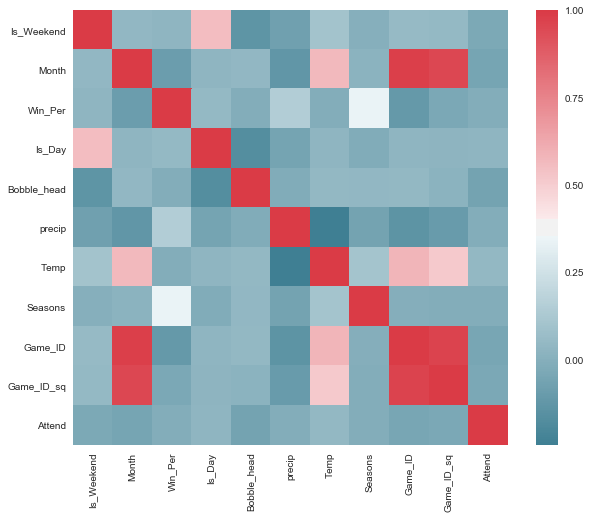

In [517]:
corr_df = scaled_df
corr_df["Attend"] = Y

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = corr_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [518]:
X = scaled_df.loc[:, ['Is_Weekend','Month','Win_Per',
       'Is_Day', 'Bobble_head', 'precip', 'Temp',
       'Seasons']] 

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [520]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [521]:
predictions = lm.predict(X)
print(predictions)

[ 44226.51548864  44267.29335781  41183.94577213  42799.20299657
  37652.57342631  37820.66162594  41385.19067252  39620.21808624
  37031.80780914  36796.99321801  37370.30174614  35489.14606364
  38346.60083037  41505.00665991  39824.81612074  38705.56002737
  39048.56366265  37145.40069315  38163.93543255  38825.22093761
  38333.197872    36781.33511126  38646.98991773  35300.99594909
  37311.5546427   38208.35535048  41063.99725443  38581.34699116
  37824.92867434  37926.11181391  42584.51100174  37442.58152483
  42921.63993765  35691.86994449  37066.82651107  40660.94240416
  38624.21916825  37878.48452364  38159.4473902   36045.06624068
  37935.01737493  39583.01532917  39759.30305688  38675.02716741
  38623.65574005  38573.45184512  43853.88742229  38503.01675659
  40172.3991878   40235.68095067  38002.95561244  41310.38465395
  39724.00877467  38584.2259556   43852.38837404  38287.68616655
  38341.9099516   41749.99892081  39706.7917988   38270.16280758
  43135.41705623  36136.0

Current size:[14.0, 9.0]


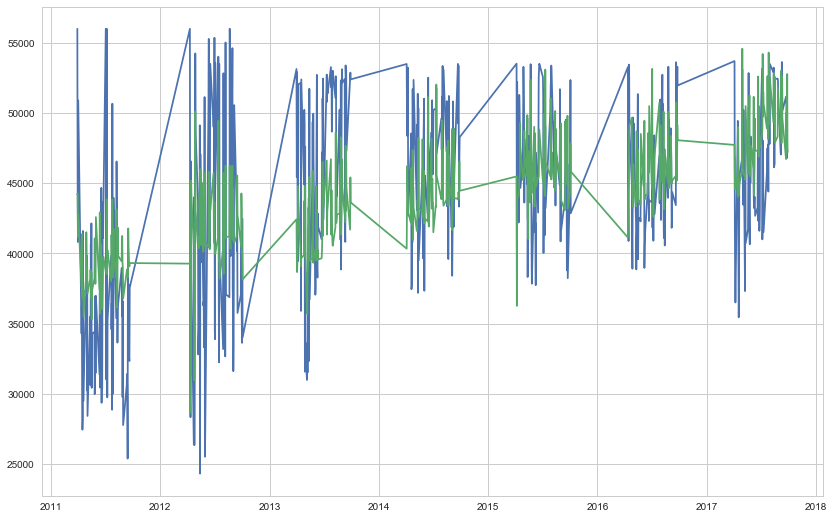

In [522]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:" + str(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df["Date"], Y)
plt.plot(df["Date"], predictions)
plt.show()

## Predictions vs Actual over one season

Current size:[14.0, 9.0]


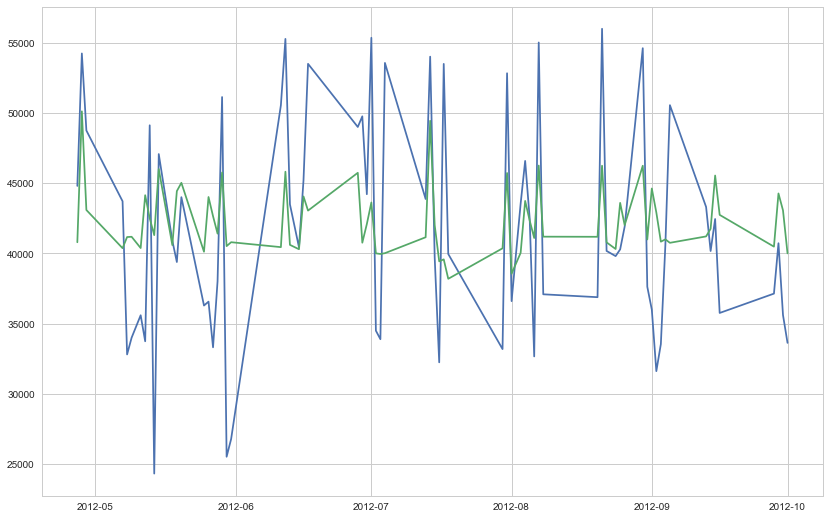

In [523]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:" + str(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df["Date"][90:160], Y[90:160])
plt.plot(df["Date"][90:160], predictions[90:160])
plt.show()

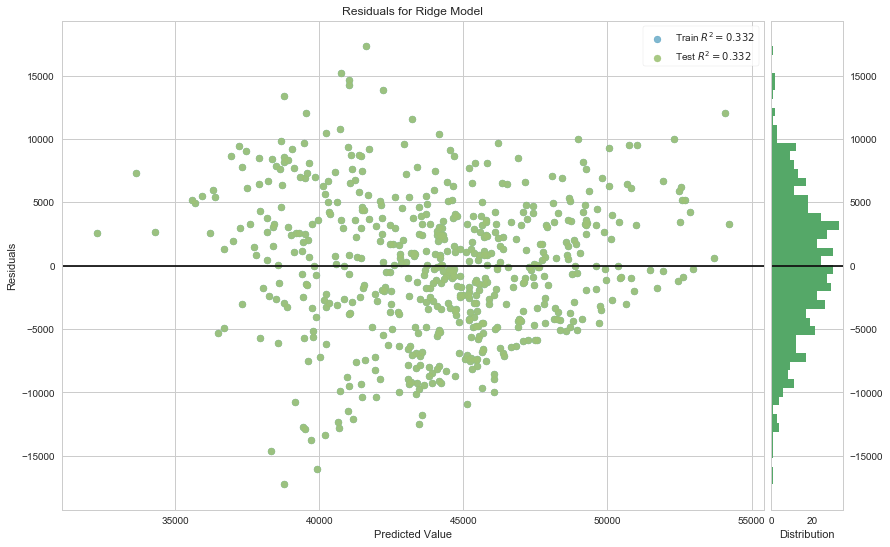

In [524]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X,Y)  
visualizer.score(X,Y)  
visualizer.poof()   

In [525]:
lm.score(X_test,y_test)

0.33863818011197078

In [526]:
lm.coef_

print(list(zip(lm.coef_,features)))

[(3452.8895542739947, 'Is_Weekend'), (285.44508416753092, 'Month'), (6925.4237749659978, 'Win_Per'), (-1848.19514733709, 'Is_Day'), (5110.6798271543357, 'Bobble_head'), (-12479.975744415831, 'precip'), (4901.320420550046, 'Temp'), (7044.315297659814, 'Seasons')]


In [527]:
lm.intercept_

34339.877292926969

## Regression Including Away Team Info

In [528]:
df.iloc[99,:]


Game_ID                             35
Opponent_Number                      2
Date               2012-05-14 00:00:00
Is_Weekend                           0
Month                                5
Year                              2012
Is_Day                               0
Win_Streak                           5
W-L                              24-11
Bobble_head                          0
precip                               0
Temp                                68
Attendance                      24,312
Win_Per                       0.685714
Seasons                              2
Attedance                        24312
Game_ID_sq                        1225
Game_ID_cub                      42875
Name: 113, dtype: object

In [529]:
for number in np.arange(1,30):
    oppo = df["Opponent_Number"] == number
    oppo_encoded = []

    for element in oppo:
        if element:
            oppo_encoded.append(1)
        else:
            oppo_encoded.append(0)
    df["encoded_team_" + str(number)] = oppo_encoded

In [530]:
features = ['Is_Weekend','Month','Win_Per',
       'Is_Day', 'Bobble_head', 'precip', 'Temp',
       'Seasons', 'encoded_team_1', 'encoded_team_2',
       'encoded_team_3', 'encoded_team_4', 'encoded_team_5', 'encoded_team_6',
       'encoded_team_7', 'encoded_team_8', 'encoded_team_9', 'encoded_team_10',
       'encoded_team_11', 'encoded_team_12', 'encoded_team_13',
       'encoded_team_14', 'encoded_team_15', 'encoded_team_16',
       'encoded_team_17', 'encoded_team_18', 'encoded_team_19',
       'encoded_team_20', 'encoded_team_21', 'encoded_team_22',
       'encoded_team_23', 'encoded_team_24', 'encoded_team_25',
       'encoded_team_26', 'encoded_team_27', 'encoded_team_28',
       'encoded_team_29']
X = df.loc[:, features]
Y = df["Attedance"]


In [531]:
X

,Is_Weekend,Month,Win_Per,Is_Day,Bobble_head,precip,Temp,Seasons,encoded_team_1,encoded_team_2,...,encoded_team_20,encoded_team_21,encoded_team_22,encoded_team_23,encoded_team_24,encoded_team_25,encoded_team_26,encoded_team_27,encoded_team_28,encoded_team_29
277,0,3,1.000000,0,0,0.0,77.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
278,0,4,1.000000,0,0,0.0,77.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
279,1,4,0.666667,1,0,0.0,65.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
280,1,4,0.750000,0,0,0.9,60.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,4,0.461538,0,0,0.0,67.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
354,0,4,0.428571,0,0,0.0,72.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
355,1,4,0.400000,0,0,0.0,76.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
356,1,4,0.437500,1,0,0.0,73.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,4,0.470588,0,0,0.0,60.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
488,0,4,0.444444,0,0,0.1,61.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [532]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [533]:
scaled_df

,Is_Weekend,Month,Win_Per,Is_Day,Bobble_head,precip,Temp,Seasons,Game_ID,Game_ID_sq,Attend
0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.604167,0.0,0.000000,0.000000,53701.0
1,0.0,0.142857,1.000000,0.0,0.0,0.000000,0.604167,0.0,0.006211,0.000114,42196.0
2,1.0,0.142857,0.500000,1.0,0.0,0.000000,0.354167,0.0,0.012422,0.000305,38373.0
3,1.0,0.142857,0.625000,0.0,0.0,0.047120,0.250000,0.0,0.018634,0.000572,36501.0
4,0.0,0.142857,0.192308,0.0,0.0,0.000000,0.395833,0.0,0.074534,0.006402,52898.0
5,0.0,0.142857,0.142857,0.0,0.0,0.000000,0.500000,0.0,0.080745,0.007431,53230.0
6,1.0,0.142857,0.100000,0.0,0.0,0.000000,0.583333,0.0,0.086957,0.008536,46128.0
7,1.0,0.142857,0.156250,1.0,0.0,0.000000,0.520833,0.0,0.093168,0.009717,49419.0
8,0.0,0.142857,0.205882,0.0,0.0,0.000000,0.250000,0.0,0.099379,0.010974,47432.0
9,0.0,0.142857,0.166667,0.0,0.0,0.005236,0.270833,0.0,0.105590,0.012308,47273.0


In [534]:
resid = predictions - Y
i = 0
for element in resid: 
    if resid.max() == element:
        print(i)
    i = i + 1
    

99


In [535]:
resid.iloc[99]

16986.283560962685

Current size:[14.0, 9.0]


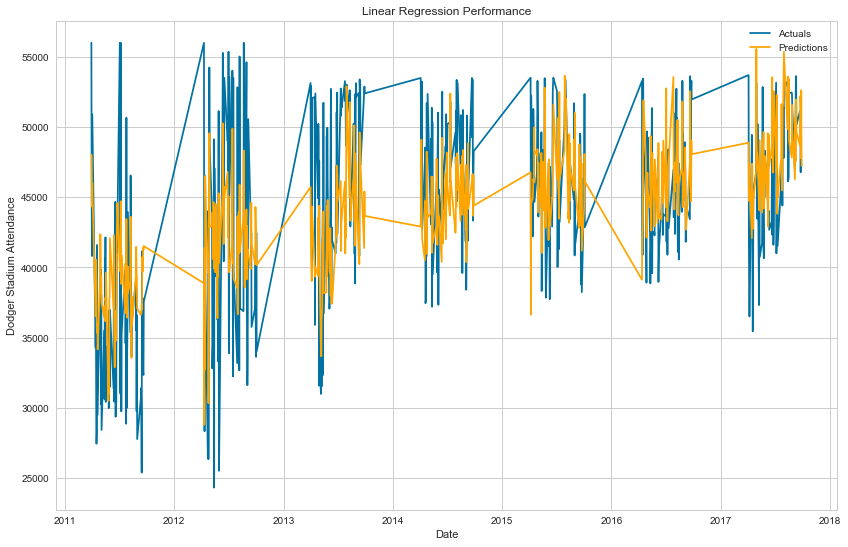

In [536]:
predictions = lm.predict(X)

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:" + str(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


plt.title("Linear Regression Performance")
plt.plot(df["Date"], Y, '-b', label = 'Actuals')
plt.plot(df["Date"], predictions, color = "orange", label = 'Predictions')

plt.ylabel("Dodger Stadium Attendance")
plt.xlabel("Date")
plt.legend(loc='upper right')
plt.savefig('overall_performance.png')
plt.show()




Current size:[14.0, 9.0]


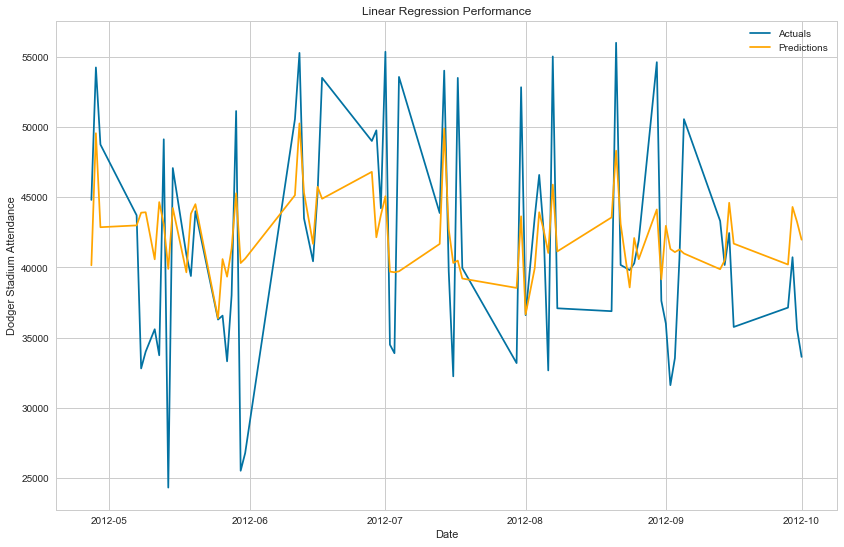

In [537]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:" + str(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df["Date"][90:160], Y[90:160], '-b', label = 'Actuals')
plt.plot(df["Date"][90:160], predictions[90:160], color = "orange", label = 'Predictions')

plt.title("Linear Regression Performance")
plt.ylabel("Dodger Stadium Attendance")
plt.xlabel("Date")
plt.legend(loc='upper right')
plt.savefig('year_performance.png')

plt.show()

In [552]:
ridge = LinearRegression()
visualizer = ResidualsPlot(ridge)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

visualizer.fit(X_train,y_train)  
visualizer.score(X_test,y_test)  
visualizer.poof(outpath = 'Residual_minus_time.jpeg')   

coef = list(zip(lm.coef_,features))

for element in coef:
    print(element[1] + " : " + str(element[0])) 

Is_Weekend : 3757.33380172
Win_Per : 12482.3223206
Is_Day : -1887.72685937
Bobble_head : 4821.80132638
precip : -641.380625487
Temp : 113.705167257
Seasons : 1049.94486206
encoded_team_1 : 81.6041683952
encoded_team_2 : -2301.93461141
encoded_team_3 : -665.21371981
encoded_team_4 : 1266.43206418
encoded_team_5 : 1885.56283429
encoded_team_6 : -872.565479213
encoded_team_7 : -2489.47075268
encoded_team_8 : -1965.23715374
encoded_team_9 : 245.138538545
encoded_team_10 : -1240.1557694
encoded_team_11 : -1347.70325583
encoded_team_12 : 1146.3022885
encoded_team_13 : 4785.07081309
encoded_team_14 : -5835.49848753
encoded_team_15 : -2119.09630223
encoded_team_16 : -4129.34881552
encoded_team_17 : 166.136111314
encoded_team_18 : -670.292661717
encoded_team_19 : 1255.59684558
encoded_team_20 : 3474.52276852
encoded_team_21 : 3732.8938773
encoded_team_22 : 1076.01170062
encoded_team_23 : -198.902881406
encoded_team_24 : 3114.16920527
encoded_team_25 : -1106.37971485
encoded_team_26 : 4402.23418

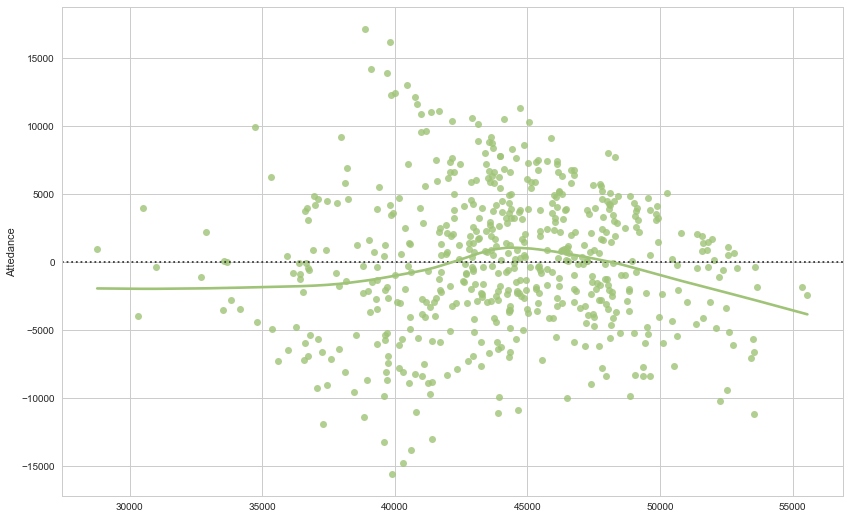

In [539]:

import seaborn as sns
sns.set(style="whitegrid")

x = predictions
y = Y - predictions

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")
plt.show()

## Adjusted R-squared 

In [540]:
import statsmodels.api as sm

In [541]:

model1=sm.OLS(endog=list(Y), exog=X.astype(float)).fit()


In [542]:
print (model1.rsquared, model1.rsquared_adj)

0.415799881163 0.376118363657


## Adjusted R-squared without Month

In [543]:
features = ['Is_Weekend','Win_Per',
       'Is_Day', 'Bobble_head', 'precip', 'Temp',
       'Seasons', 'encoded_team_1', 'encoded_team_2',
       'encoded_team_3', 'encoded_team_4', 'encoded_team_5', 'encoded_team_6',
       'encoded_team_7', 'encoded_team_8', 'encoded_team_9', 'encoded_team_10',
       'encoded_team_11', 'encoded_team_12', 'encoded_team_13',
       'encoded_team_14', 'encoded_team_15', 'encoded_team_16',
       'encoded_team_17', 'encoded_team_18', 'encoded_team_19',
       'encoded_team_20', 'encoded_team_21', 'encoded_team_22',
       'encoded_team_23', 'encoded_team_24', 'encoded_team_25',
       'encoded_team_26', 'encoded_team_27', 'encoded_team_28',
       'encoded_team_29']
X = df.loc[:, features]
Y = df["Attedance"]

In [544]:
model1=sm.OLS(endog=list(Y), exog=X.astype(float)).fit()
print (model1.rsquared, model1.rsquared_adj)

0.41566165158 0.377145941232


## Adjusted R-squared with polynomial regression

In [545]:
X["Game_ID"] = scaled_df.loc[:, "Game_ID"]
X["Game_ID_sq"] = scaled_df.loc[:, "Game_ID_sq"]
#X["Game_ID_cub"] = scaled_df.loc[:, "Game_ID_cub"]


In [546]:
X

,Is_Weekend,Win_Per,Is_Day,Bobble_head,precip,Temp,Seasons,encoded_team_1,encoded_team_2,encoded_team_3,...,encoded_team_22,encoded_team_23,encoded_team_24,encoded_team_25,encoded_team_26,encoded_team_27,encoded_team_28,encoded_team_29,Game_ID,Game_ID_sq
277,0,1.000000,0,0,0.0,77.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.434783,0.192051
278,0,1.000000,0,0,0.0,77.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.440994,0.197500
279,1,0.666667,1,0,0.0,65.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.447205,0.203026
280,1,0.750000,0,0,0.9,60.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.453416,0.208627
353,0,0.461538,0,0,0.0,67.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.335404,0.115231
354,0,0.428571,0,0,0.0,72.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.341615,0.119460
355,1,0.400000,0,0,0.0,76.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.347826,0.123766
356,1,0.437500,1,0,0.0,73.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.354037,0.128148
487,0,0.470588,0,0,0.0,60.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.006211,0.000114
488,0,0.444444,0,0,0.1,61.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.012422,0.000305


In [547]:
model1=sm.OLS(endog=list(Y), exog=X.astype(float)).fit()
print (model1.rsquared, model1.rsquared_adj)

0.420721552368 0.380204912363


In [548]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)


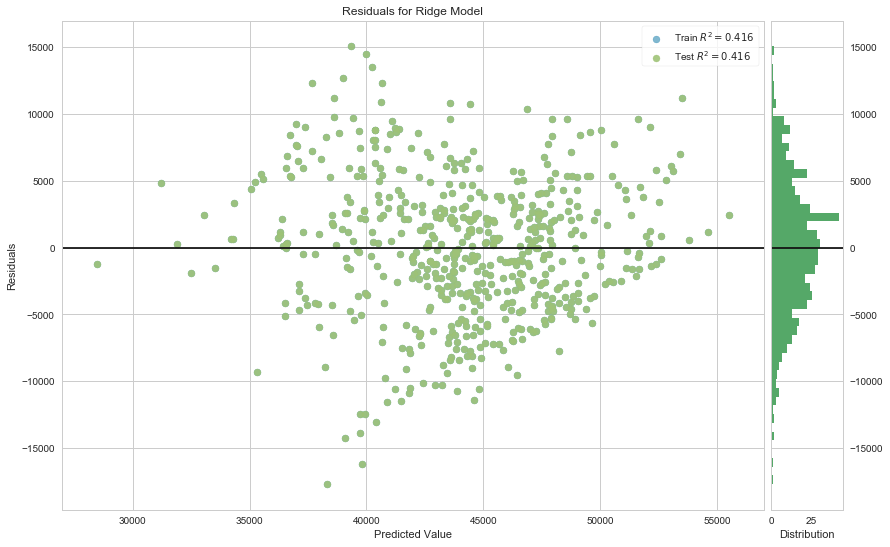

In [549]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X,Y)  
visualizer.score(X,Y)  
visualizer.poof()   


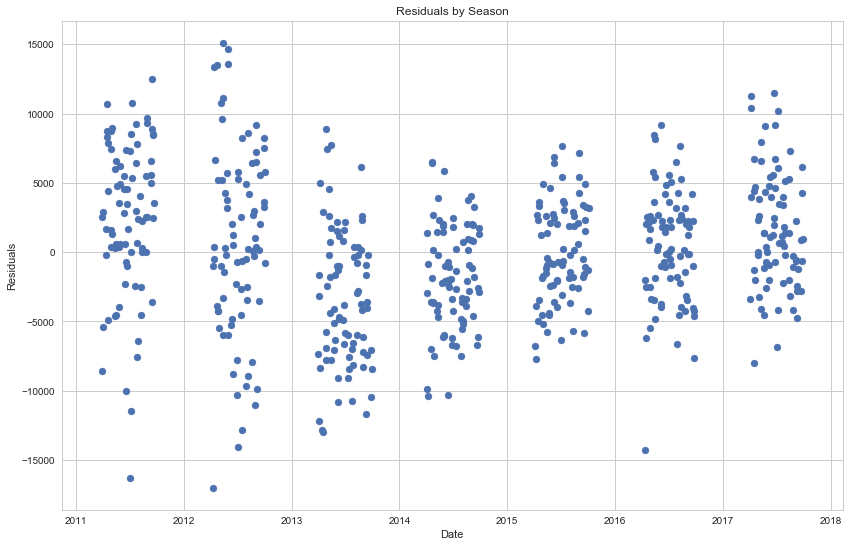

In [550]:
plt.scatter(list(df["Date"]),predictions - Y)
plt.title("Residuals by Season")
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.savefig('residual_by_year.png')
plt.show()

(0.27235897388195812, 4.2201499824530797e-11)
(0.2184670569021416, 1.5637763647274367e-07)


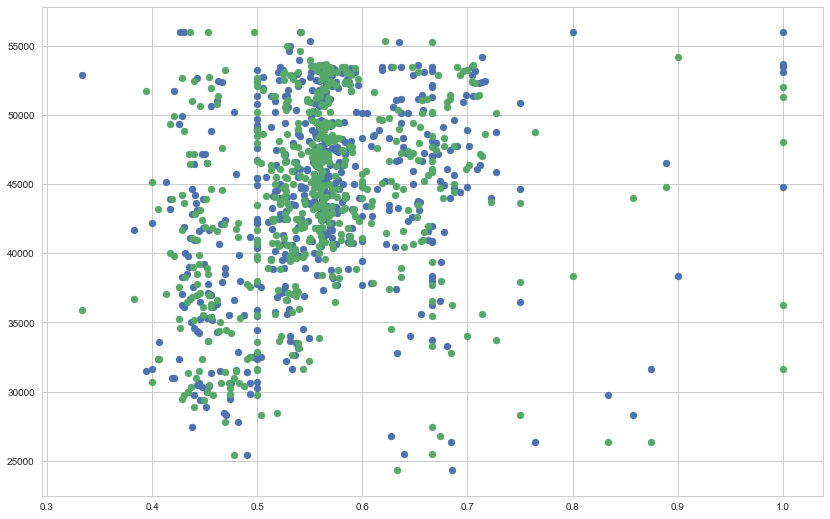

In [551]:
from scipy.stats.stats import pearsonr

plt.scatter(X['Win_Per'], Y)
print(pearsonr(X['Win_Per'], Y))
plt.scatter(X["Win_Per"][0:562], Y[5:567])
print(pearsonr(X['Win_Per'][0:565], Y[2:567]))
plt.show()


